<a href="https://colab.research.google.com/github/mkrajevsky/NLP_guzman/blob/main/Micha%C5%82_Krajewski_06_Multilayer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#$\textbf{Multilayer Perceptron}$
---

$\textbf{Import libraries}$

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from itertools import product as prod
import pandas as pd


$\textbf{Multilayer Perceptron} {\color{blue}{\textbf{ class}} \textbf{ with}} \color{green}{\textbf{ 1 hidden layer}}$

In [ ]:
class MLP(tf.keras.Model):
    def __init__(self, units):
        super().__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=units, activation=tf.nn.sigmoid)
        self.output_layer = tf.keras.layers.Dense(units=1, activation=tf.nn.sigmoid)

    def call(self, inputs):
        x = self.hidden_layer(inputs)
        return self.output_layer(x)

$\textbf{Feedforward Neural Network} \color{blue}{\textbf{ class }}$

In [ ]:
class Feedforward_Model:
    def __init__(self, X, Y, units=2):
        self.X = X
        self.Y = Y
        self.model = MLP(units)
        self.loss_acc = None

    # train the model
    def train(self, LR, epochs):
        self.model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=LR),
                           loss=tf.keras.losses.BinaryCrossentropy(),
                           metrics=['accuracy'])
        self.loss_acc = self.model.fit(self.X, self.Y, epochs=epochs, verbose=0)

    # plot loss and accuracy history
    def plot_loss_accuracy(self):
        fig = plt.figure(figsize=(8, 4))
        fig.suptitle('Log Loss and Accuracy over epochs')

        # add_subplot(nrows, ncolumns, index)
        ax = fig.add_subplot(1, 2, 1)
        ax.plot(self.loss_acc.history['loss'])
        ax.grid(True)
        ax.set(xlabel='Epochs', title='Log Loss')

        ax = fig.add_subplot(1, 2, 2)
        ax.plot(self.loss_acc.history['accuracy'])
        ax.grid(True)
        ax.set(xlabel='Epochs', title='Accuracy')

$\textbf{Evaluation Metrics} \color{blue}{\textbf{ class }}$

In [ ]:
class Metrics:
    def __init__(self, X, Y, pred):
        self.N = len(X)
        self.TP = X[(pred==1) & (Y==1)] # True positives
        self.TN = X[(pred==0) & (Y==0)] # True negatives
        self.FP = X[(pred==1) & (Y==0)] # False positives
        self.FN = X[(pred==0) & (Y==1)] # False negatives

    def confusion_matrix(self):
        return np.array([[len(self.TP), len(self.FN)],
                         [len(self.FP), len(self.TN)]])

    def accuracy(self):
        return (len(self.TP) + len(self.TN))/self.N

    def precision(self):
        return len(self.TP)/(len(self.TP) + len(self.FP))

    def recall(self):
        return len(self.TP)/(len(self.TP) + len(self.FN))

    def F_beta_score(self, beta):
        p = self.precision()
        r = self.recall()
        return (1 + beta**2) * ((p*r) / ((beta**2 * p) + r))

    def plot_predictions(self):
        fig = plt.figure(figsize=(6, 6))
        ax = fig.add_subplot(1, 1, 1)

        # True predictions
        ax.scatter(self.TP[:, 0], self.TP[:, 1], label="True Positives", c='b')
        ax.scatter(self.TN[:, 0], self.TN[:, 1], label="True Negatives", c='r')
        # False predictions
        ax.scatter(self.FP[:, 0], self.FP[:, 1], label="False Positives", c='y')
        ax.scatter(self.FN[:, 0], self.FN[:, 1], label="False Negatives", c='g')

        ax.axis('equal')
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()

#$\color{red} {\textbf{Synthetic Datasets}}$

$\textbf{Patterns function to generate data for binary classification}$

In [ ]:
def patterns(N=500, type='linear'):
    '''
    input: size of data (N)
           type of pattern ('circle', 'diamond', 'square', 'thick angle', 'thin angle', 'linear')
    output: inputs (X) and labels (Y)
    '''
    # build an array of N inputs with 2 features
    X = np.random.uniform(-1, 1, (N, 2))
    #print(X.shape)

    # build labels for each element of X
    if type == 'circle':
        Y = (np.sqrt(X[:,0]**2 + X[:,1]**2)<0.7).astype(int)
    # diamond pattern
    elif type == 'diamond':
        Y = ((np.abs(X[:,0]) + np.abs(X[:,1]))<1).astype(int)
    # centered square pattern
    elif type == 'square':
        Y = ((np.maximum(np.abs(X[:,0]), np.abs(X[:,1])))<.5).astype(int)
    # thick right angle pattern
    elif type == 'thick angle':
        Y = (((np.maximum((X[:,0]), (X[:,1])))<.5) & ((np.maximum((X[:,0]), (X[:,1])))>-.5)).astype(int)
    # thin right angle pattern
    elif type == 'thin angle':
        Y = (((np.maximum((X[:,0]), (X[:,1])))<.5) & ((np.maximum((X[:,0]), (X[:,1])))>0)).astype(int)
    # linear pattern
    else:
        Y = ((X[:,0] + X[:,1])>0).astype(int)

    return X, Y

$\textbf{Plot Function}$

In [ ]:
def plot_data(X, Y):
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(X[Y==1, 0], X[Y==1, 1], c='r')
    ax.scatter(X[Y==0, 0], X[Y==0, 1], c='b')
    ax.axis('equal')

$\textbf{Create and plot a dataset}$

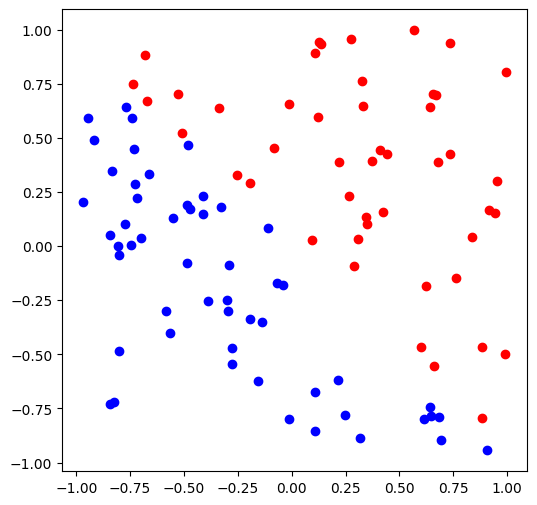

In [ ]:
X, Y = patterns(100)
# X, Y = patterns(500, type='thick angle')
plot_data(X, Y)

#$\textbf{Main}$
---

$\textbf{Model Training}$

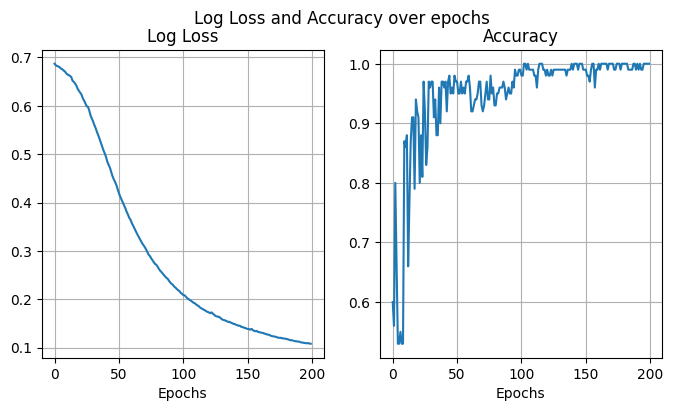

In [ ]:
# define a feedforward neural network
fnn = Feedforward_Model(X, Y)
# training process
fnn.train(LR=0.25, epochs=200)
# plot model and error/accuracy history
fnn.plot_loss_accuracy()

$\textbf{Model Evaluation}$

[[47  0]
 [ 0 53]]
Accuracy: 1.0


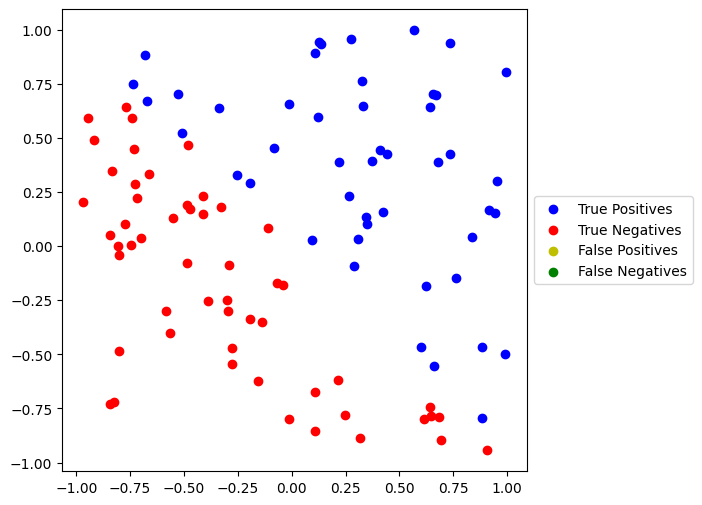

In [ ]:
pred = fnn.model.predict(X, verbose=0)
m = Metrics(X, Y, np.round(pred.reshape(-1)))

print(m.confusion_matrix())
print(f'Accuracy: {m.accuracy()}')
# print(f'Precision: {m.precision()}')
# print(f'Recall: {m.recall()}')
# print(f'F(1) Score: {m.F_beta_score(1)}')
# print(f'F(0.5) Score: {m.F_beta_score(0.5)}')
# print(f'F(2) Score: {m.F_beta_score(2)}')
m.plot_predictions()

In [ ]:
prod([1,2,3],["a,b"],["31","12"])

In [ ]:
def gridsearch(pattern, hyperparameters=[400,0.1]):
     # define default hyperparameters (and/or get them as an argument)
     LR = [0.1,0.2]
     epochs = [200,500]
     units = [8,12]
     rows_list =[]
    # generate dataset
     X, Y = patterns(500, type=pattern)
     i = 1
     for comb in prod(LR,epochs,units):
        model = Feedforward_Model(X,Y, comb[2])
        model.train(comb[0],comb[1])
        dict_row = {"Model": i , "LR":comb[0] , "Epochs":comb[1] , "Units":comb[2] , "Accuracy": model.loss_acc.history['accuracy'][-1] }
        rows_list.append(dict_row)
        i+=1

     scores = pd.DataFrame(rows_list)
     return scores

In [ ]:
gridsearch('circle')

,Model,LR,Epochs,Units,Accuracy
0,1,0.1,200,8,0.592
1,2,0.1,200,12,0.588
2,3,0.1,500,8,0.786
3,4,0.1,500,12,0.952
4,5,0.2,200,8,0.708
5,6,0.2,200,12,0.760
6,7,0.2,500,8,0.946
7,8,0.2,500,12,0.964


0.2
16/16 [==============================] - 0s 2ms/step


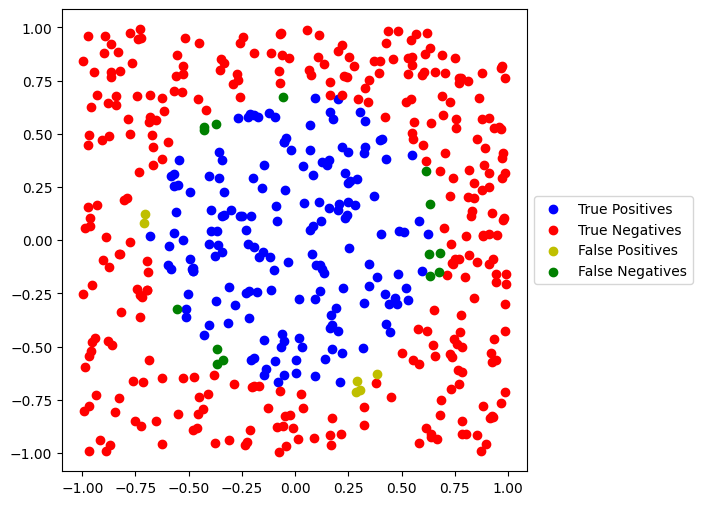

0.2
16/16 [==============================] - 0s 2ms/step


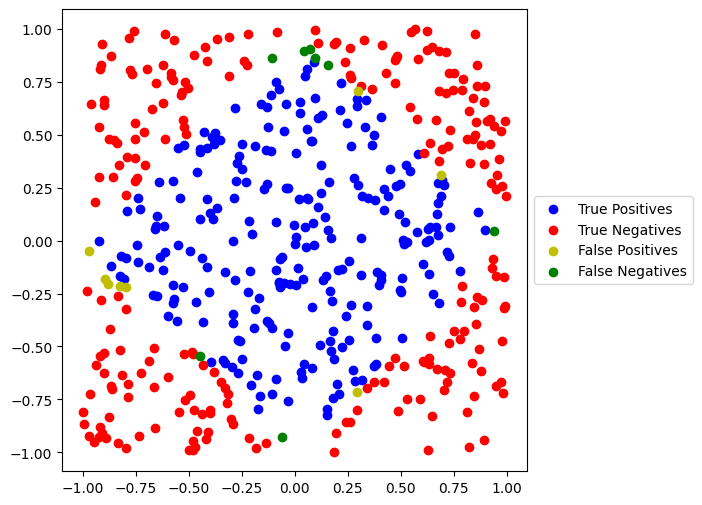

0.2
16/16 [==============================] - 0s 2ms/step


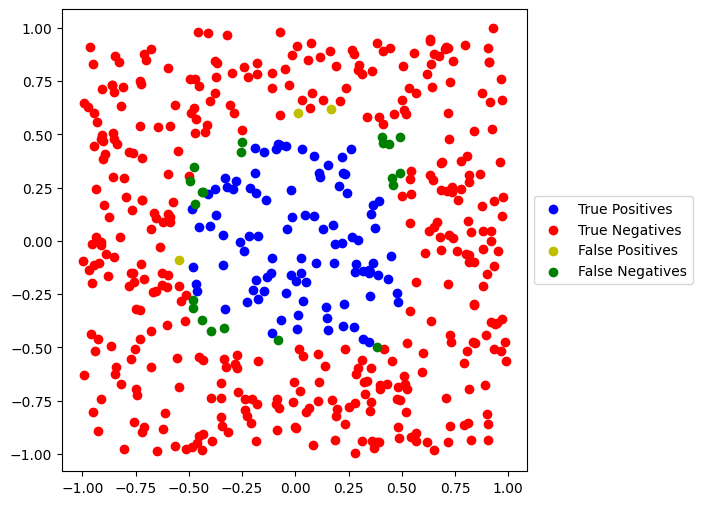

0.2
16/16 [==============================] - 0s 2ms/step


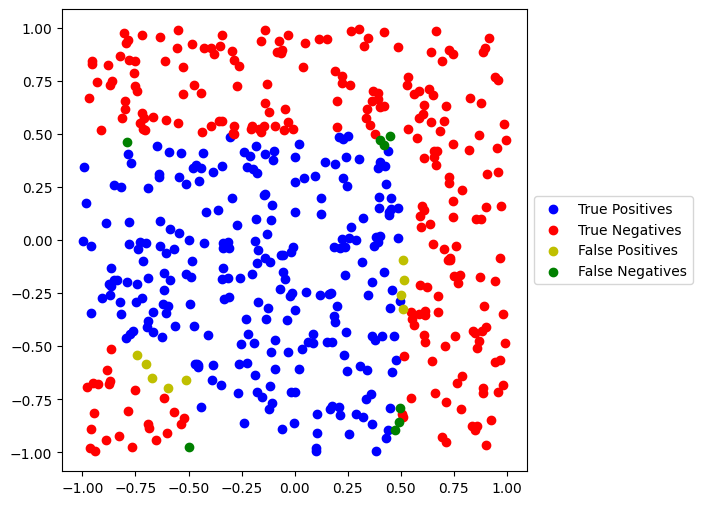

0.2
16/16 [==============================] - 0s 2ms/step


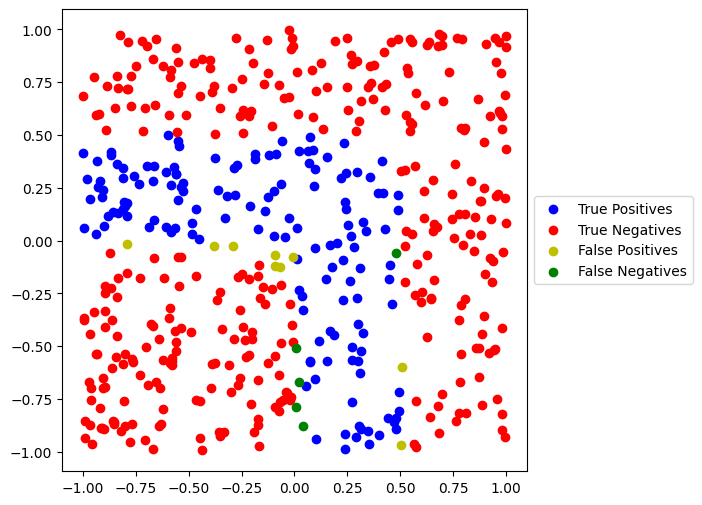

0.1
16/16 [==============================] - 0s 2ms/step


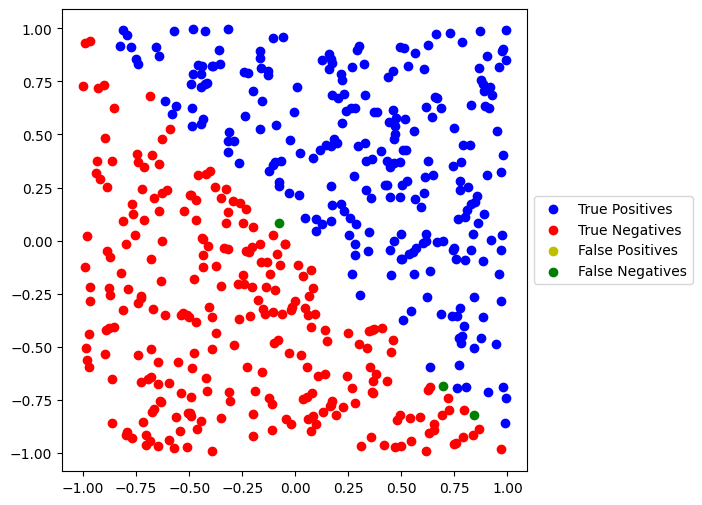

In [ ]:
for shape_name in ('circle', 'diamond', 'square', 'thick angle', 'thin angle', 'linear'):
    df = gridsearch(shape_name)
    vals = df.loc[df["Accuracy"].idxmax()]
    X,Y = patterns(type=shape_name)
    print(vals["LR"])
    fnn = Feedforward_Model(X,Y, units = vals["Units"])
    fnn.train(vals["LR"], int(vals["Epochs"]))
    pred = fnn.model.predict(X)
    m = Metrics(X, Y, np.round(pred.reshape(-1)))
    m.plot_predictions()

